In [ ]:
#We stablish conection with google drive (just in case you are working with Google Colab)
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# set the directory
%cd "/content/drive/My Drive/Colab_Notebooks/Data_Science/3_Sentiment_Analysis"

/content/drive/My Drive/Colab_Notebooks/Data_Science/3_Sentiment_Analysis


In [ ]:
!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

Found existing installation: torch 2.1.0+cu121
Uninstalling torch-2.1.0+cu121:
  Successfully uninstalled torch-2.1.0+cu121
Found existing installation: torchaudio 2.1.0+cu121
Uninstalling torchaudio-2.1.0+cu121:
  Successfully uninstalled torchaudio-2.1.0+cu121
Found existing installation: torchvision 0.16.0+cu121
Uninstalling torchvision-0.16.0+cu121:
  Successfully uninstalled torchvision-0.16.0+cu121
Found existing installation: torchtext 0.16.0
Uninstalling torchtext-0.16.0:
  Successfully uninstalled torchtext-0.16.0
Found existing installation: torchdata 0.7.0
Uninstalling torchdata-0.7.0:
  Successfully uninstalled torchdata-0.7.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install transformers

# Import dependencies

In [ ]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Instantiate Model

for more information about Hugging Face sentiment model go to [Bert multilingual uncased sentiment model](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

# Encode and Calculate Sentiment

In [ ]:
tokens = tokenizer.encode('I like you', return_tensors='pt').to(device)

In [ ]:
result = model(tokens)

In [ ]:
result.logits

tensor([[-2.5482, -2.0741,  0.1967,  1.8302,  1.9354]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
int(torch.argmax(result.logits)) + 1

5

# Collect Comments

the dataset was extracted from Kaggle: [Metacritics Video Game Comments](https://www.kaggle.com/datasets/dahlia25/metacritic-video-game-comments/data)

In [ ]:
df = pd.read_csv('metacritic_comments.csv')
df

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...,...
283978,283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [ ]:
df = df[['Title', 'Platform', 'Userscore', 'Comment']]
df

,Title,Platform,Userscore,Comment
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it..."
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...
...,...,...,...,...
283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn..."
283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...
283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...
283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual..."


In [ ]:
df['Comment'].isna().sum()

23

In [ ]:
df = df.dropna()

# Score each Comment

In [ ]:
# Function to score every comment from 1 to 5
def Sent_score(comment):
    tokens = tokenizer.encode(comment, return_tensors='pt').to(device)
    result = model(tokens)
    return (int(torch.argmax(result.logits))+1)

In [ ]:
Sent_score(df['Comment'].iloc[0])

5

In [ ]:
tokenizer.model_max_length = 512

In [ ]:
df['Sentiment'] = df['Comment'].apply(lambda x: Sent_score(x[:510]))

In [ ]:
# The values should be between 1 and 5
df['Sentiment'] = df['Sentiment'] + 1

<ipython-input-80-fc127eb617b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'] + 1


In [ ]:
df.head()

,Title,Platform,Userscore,Comment,Sentiment
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",5
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,4
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,4
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,5
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,5


In [ ]:
# Save the data plus score of sentiment
#df.to_csv('comment_sentiment.csv', index=False)

# Analysis of the Results

In [ ]:
# Load dataset plus sentiments
df = pd.read_csv('comment_sentiment.csv')

In [ ]:
df.Platform.unique()

array(['Nintendo64', 'PlayStation', 'PlayStation3', 'Dreamcast',
       'Xbox360', 'Wii', 'XboxOne', 'Switch', 'PlayStation2',
       'PlayStation4', 'GameCube', 'Xbox', 'PC', 'WiiU', 'GameBoyAdvance',
       '3DS', 'DS', 'PlayStationVita', 'PSP', 'not specified'],
      dtype=object)

In [ ]:
df = df[df['Platform'] != 'not specified']
df.Platform.unique()

array(['Nintendo64', 'PlayStation', 'PlayStation3', 'Dreamcast',
       'Xbox360', 'Wii', 'XboxOne', 'Switch', 'PlayStation2',
       'PlayStation4', 'GameCube', 'Xbox', 'PC', 'WiiU', 'GameBoyAdvance',
       '3DS', 'DS', 'PlayStationVita', 'PSP'], dtype=object)

<ipython-input-326-d4850e1ecf79>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,2,3,4,5], fontsize=14, fontweight="bold")


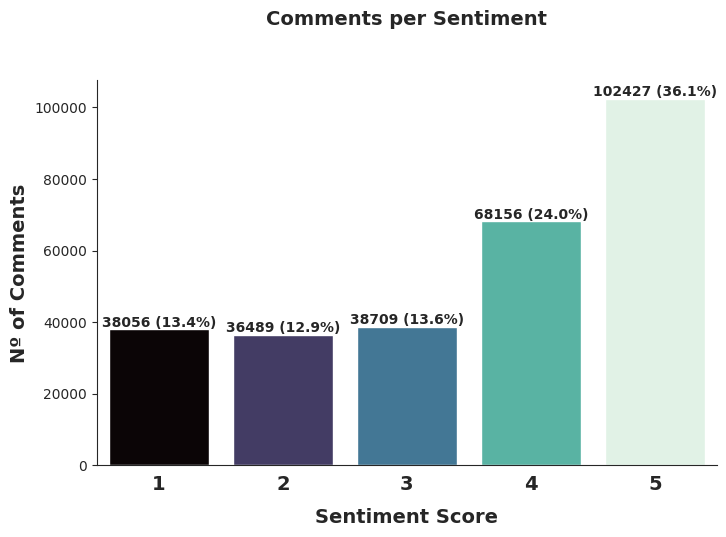

In [ ]:
# Plot the histogram of different sentiment categories in the game industry
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("ticks")

sns.countplot(df,
            x='Sentiment',
            legend = False,
            hue='Sentiment',
            palette='mako',
            )

# label each bar in histogram
for p in ax.patches:
  height = p.get_height()
  per = height/len(df)
  ax.text(x = p.get_x()+(p.get_width()/2),
          y = height+700,
          s = '{:.0f} ({:.1%})'.format(height, per),
          ha = "center",
          fontweight='bold')

sns.despine()
ax.set_ylabel("Nº of Comments", fontsize=14, fontweight="bold")
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels([1,2,3,4,5], fontsize=14, fontweight="bold")
ax.set_xlabel("Sentiment Score", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Comments per Sentiment", fontsize=14, pad=40, fontweight='bold')


plt.show()

In [ ]:
lista_pl = []
for plat in df.Platform.unique():
  consola = df[df['Platform'] == plat]
  lista_pl.append([plat, consola['Sentiment'].mean()])

lista_pl = pd.DataFrame(lista_pl)
lista_pl = lista_pl.sort_values(by=1, ascending=False)
lista_pl

order_val= lista_pl[0].values

<ipython-input-284-5d9587ce8ba6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-284-5d9587ce8ba6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,


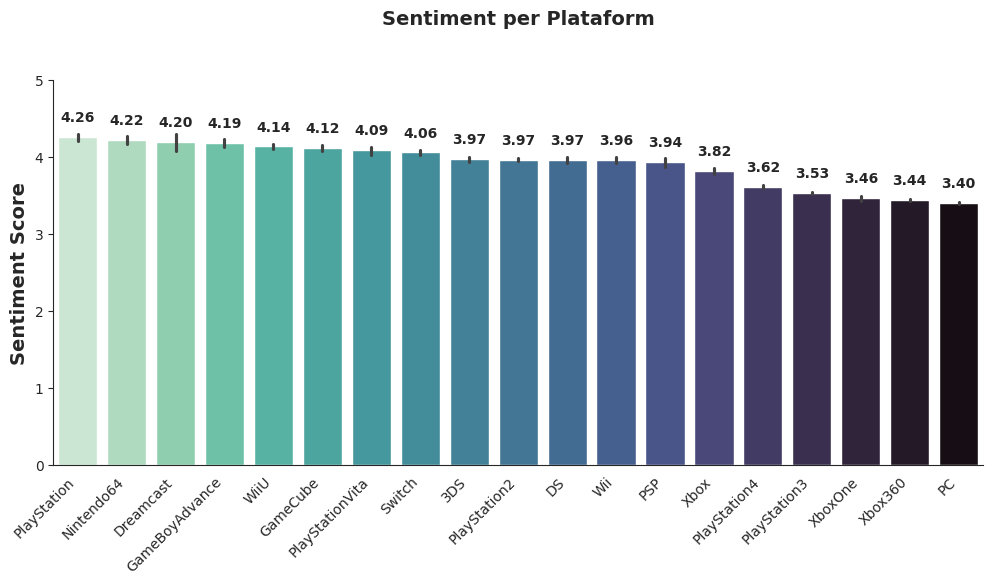

In [ ]:
# Boxplot of sentiment for the different companies
fig2, ax2 = plt.subplots(figsize=(12,5))
sns.set_style("ticks")


sns.barplot(
    df,
    x='Platform',
    y='Sentiment',
    palette='mako_r',
    order=order_val,
)
# label each bar in histogram
for p in ax2.patches:
 height = p.get_height()
 ax2.text(x = p.get_x()+(p.get_width()/2),
         y = height+.2,
         s = '{:.2f}'.format(height),
         ha = "center",
         fontweight='bold')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

sns.despine()
plt.ylabel("Sentiment Score", fontsize=14, fontweight="bold")
plt.xlabel("")
ax2.set_yticks([0,1,2,3,4,5])
ax2.set_ylim(0, 5)
ax2.xaxis.set_ticks_position('none')
plt.title("Sentiment per Plataform", fontsize=14, pad=40, fontweight='bold')

plt.show()

In [ ]:
ranking = df.groupby(['Platform', 'Title'], as_index=False).mean()
ranking

<ipython-input-282-5752e2525735>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ranking = df.groupby(['Platform', 'Title'], as_index=False).mean()


,Platform,Title,Userscore,Sentiment
0,3DS,3D After Burner II,8.000000,4.500000
1,3DS,3D Gunstar Heroes,8.750000,4.750000
2,3DS,3D Out Run,9.750000,4.250000
3,3DS,3D Sonic the Hedgehog 2,9.000000,4.214286
4,3DS,3D Streets of Rage II,10.000000,4.666667
...,...,...,...,...
3347,XboxOne,What Remains of Edith Finch,8.187500,3.875000
3348,XboxOne,Wolfenstein II: The New Colossus,7.101695,3.440678
3349,XboxOne,XCOM 2,8.200000,3.666667
3350,XboxOne,Yoku's Island Express,8.500000,4.000000


In [ ]:
ranking = ranking[ranking["Platform"].isin(['PlayStation','Nintendo64','Dreamcast'])]

In [ ]:
ranking.sort_values(['Sentiment', 'Platform'], ascending = False, inplace=True)

<ipython-input-183-142afb2bd7ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking.sort_values(['Sentiment', 'Platform'], ascending = False, inplace=True)


In [ ]:
# Isolate the three different platform results
df_ps = df[df['Platform'] == 'PlayStation']
df_nd = df[df['Platform'] == 'Nintendo64']
df_dc = df[df['Platform'] == 'Dreamcast']

<ipython-input-321-650733d8b28b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,2,3,4,5], fontsize=14, fontweight="bold")


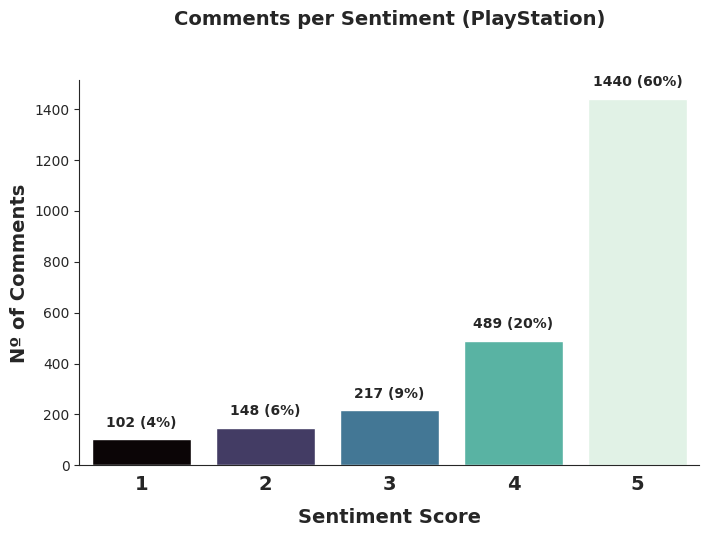

In [ ]:
# Plot the histogram of different sentiment categories in the PlayStation games
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("ticks")

sns.countplot(df_ps,
            x='Sentiment',
            legend = False,
            hue='Sentiment',
            palette='mako',
            )

# label each bar in histogram
for p in ax.patches:
  height = p.get_height()
  per = height/len(df_ps)
  ax.text(x = p.get_x()+(p.get_width()/2),
          y = height+50,
          s = '{:.0f} ({:.0%})'.format(height, per),
          ha = "center",
          fontweight='bold')

sns.despine()
ax.set_ylabel("Nº of Comments", fontsize=14, fontweight="bold")
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels([1,2,3,4,5], fontsize=14, fontweight="bold")
ax.set_xlabel("Sentiment Score", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Comments per Sentiment (PlayStation)", fontsize=14, pad=40, fontweight='bold')


plt.show()

<ipython-input-328-133e993292f1>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,2,3,4,5], fontsize=14, fontweight="bold")


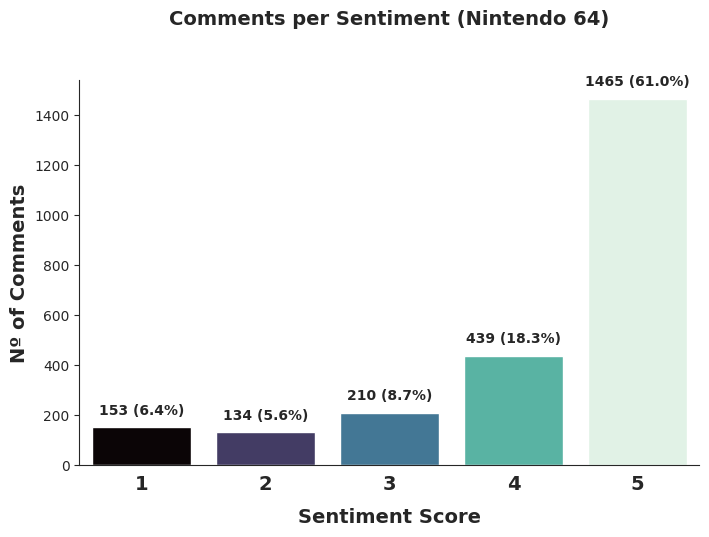

In [ ]:
# Plot the histogram of different sentiment categories in the Nintendo 64 games
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("ticks")

sns.countplot(df_nd,
            x='Sentiment',
            legend = False,
            hue='Sentiment',
            palette='mako',
            )

# label each bar in histogram
for p in ax.patches:
  height = p.get_height()
  per = height/len(df_nd)
  ax.text(x = p.get_x()+(p.get_width()/2),
          y = height+50,
          s = '{:.0f} ({:.1%})'.format(height, per),
          ha = "center",
          fontweight='bold')

sns.despine()
ax.set_ylabel("Nº of Comments", fontsize=14, fontweight="bold")
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels([1,2,3,4,5], fontsize=14, fontweight="bold")
ax.set_xlabel("Sentiment Score", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Comments per Sentiment (Nintendo 64)", fontsize=14, pad=40, fontweight='bold')


plt.show()

<ipython-input-329-f22065b926af>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,2,3,4,5], fontsize=14, fontweight="bold")


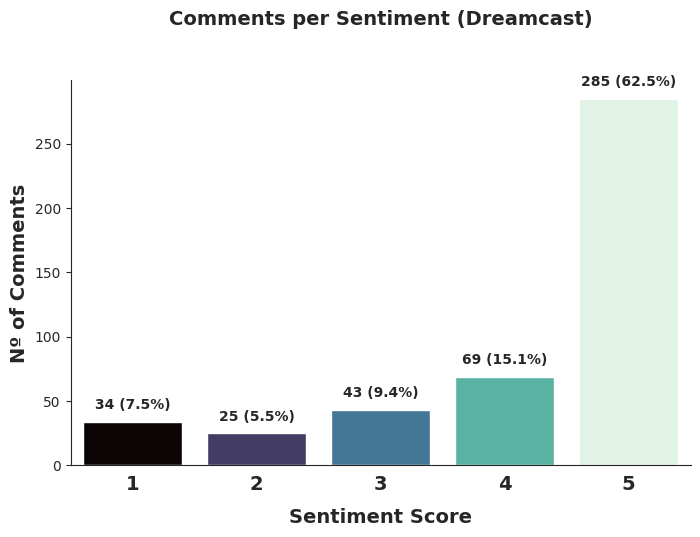

In [ ]:
# Plot the histogram of different sentiment categories in the Dreamcast games
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("ticks")

sns.countplot(df_dc,
            x='Sentiment',
            legend = False,
            hue='Sentiment',
            palette='mako',
            )

# label each bar in histogram
for p in ax.patches:
  height = p.get_height()
  per = height/len(df_dc)
  ax.text(x = p.get_x()+(p.get_width()/2),
          y = height+10,
          s = '{:.0f} ({:.1%})'.format(height, per),
          ha = "center",
          fontweight='bold')

sns.despine()
ax.set_ylabel("Nº of Comments", fontsize=14, fontweight="bold")
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels([1,2,3,4,5], fontsize=14, fontweight="bold")
ax.set_xlabel("Sentiment Score", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Comments per Sentiment (Dreamcast)", fontsize=14, pad=40, fontweight='bold')


plt.show()

In [ ]:
# Obtain the top 10 games
ranking_10 = pd.DataFrame()
for plat in ranking['Platform'].unique():
  q = ranking[ranking['Platform'] == plat]
  q = q[:10]
  ranking_10 = ranking_10.append(q, ignore_index=True)

<ipython-input-199-c41c021da6b8>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking_10 = ranking_10.append(q, ignore_index=True)


In [ ]:
ps_fil = ranking_10[ranking_10['Platform'] == 'PlayStation']['Title'].unique()
PS = df[df['Platform'] == 'PlayStation']
PS = PS[PS['Title'].isin(ps_fil)]

In [ ]:
nd_fil = ranking_10[ranking_10['Platform'] == 'Nintendo64']['Title'].unique()
ND = df[df['Platform'] == 'Nintendo64']
ND = ND[ND['Title'].isin(nd_fil)]

In [ ]:
dc_fil = ranking_10[ranking_10['Platform'] == 'Dreamcast']['Title'].unique()
DC = df[df['Platform'] == 'Dreamcast']
DC = DC[DC['Title'].isin(dc_fil)]

In [ ]:
lista_pl = []
for tit in PS.Title.unique():
  consola = PS[PS['Title'] == tit]
  lista_pl.append([tit, consola['Sentiment'].mean()])

lista_pl = pd.DataFrame(lista_pl)
lista_pl = lista_pl.sort_values(by=1, ascending=False)
lista_pl

order_val_PS= lista_pl[0].values

<ipython-input-297-67631950fc66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-297-67631950fc66>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,


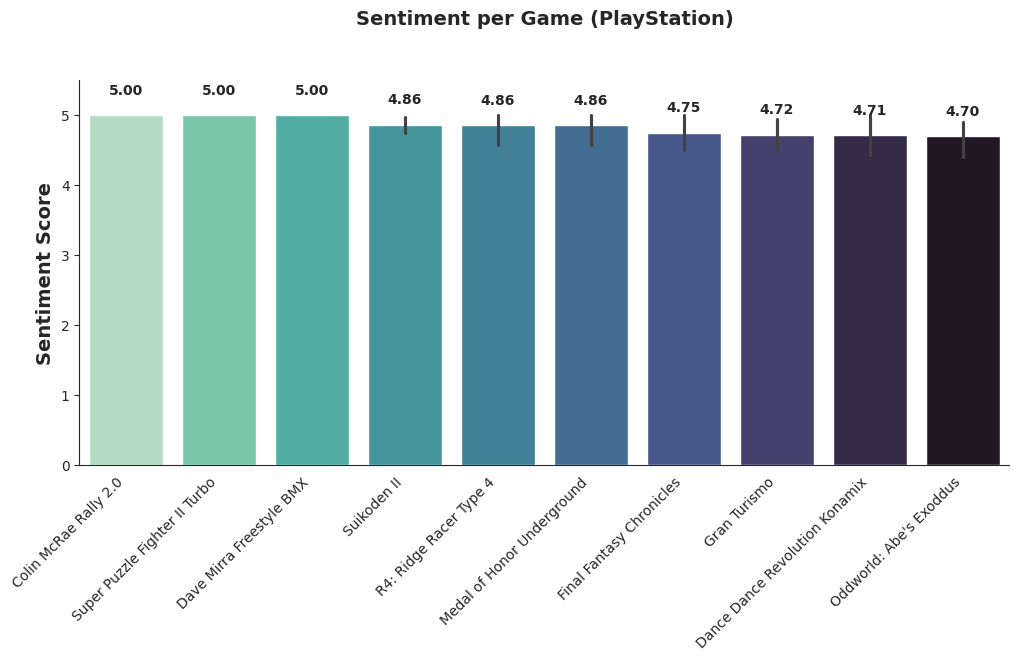

In [ ]:
# Boxplot of sentiment for the different titles from PlayStation

fig2, ax2 = plt.subplots(figsize=(12,5))
sns.set_style("ticks")

sns.barplot(
    PS,
    x='Title',
    y='Sentiment',
    palette='mako_r',
    order=order_val_PS
)

# label each bar in histogram
for p in ax2.patches:
 height = p.get_height()
 ax2.text(x = p.get_x()+(p.get_width()/2),
         y = height+.3,
         s = '{:.2f}'.format(height),
         ha = "center",
         fontweight='bold')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,
                        horizontalalignment='right')


sns.despine()
plt.ylabel("Sentiment Score", fontsize=14, fontweight="bold")
plt.xlabel("")
ax2.set_yticks([0,1,2,3,4,5])
ax2.set_ylim(0, 5.5)
ax2.xaxis.set_ticks_position('none')
plt.title("Sentiment per Game (PlayStation)", fontsize=14, pad=40, fontweight='bold')

plt.show()

In [ ]:
lista_pl = []
for tit in ND.Title.unique():
  consola = ND[ND['Title'] == tit]
  lista_pl.append([tit, consola['Sentiment'].mean()])

lista_pl = pd.DataFrame(lista_pl)
lista_pl = lista_pl.sort_values(by=1, ascending=False)
lista_pl

order_val_ND= lista_pl[0].values

<ipython-input-294-c9b820c60996>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-294-c9b820c60996>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,


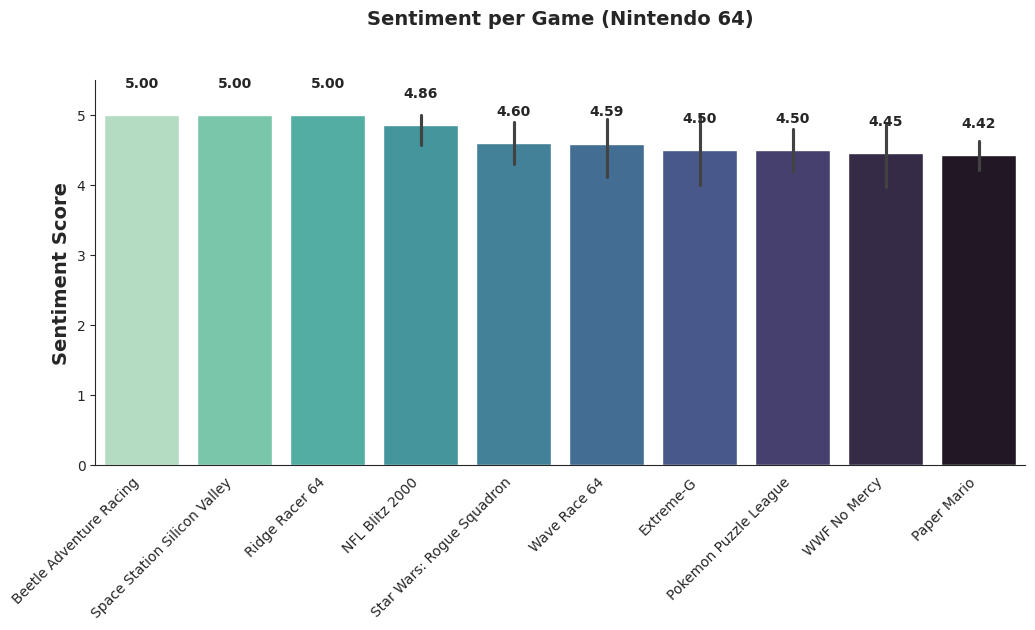

In [ ]:
# Boxplot of sentiment for the different titles from Nintendo 64

fig2, ax2 = plt.subplots(figsize=(12,5))
sns.set_style("ticks")

sns.barplot(
    ND,
    x='Title',
    y='Sentiment',
    palette='mako_r',
    order=order_val_ND
)

# label each bar in histogram
for p in ax2.patches:
 height = p.get_height()
 ax2.text(x = p.get_x()+(p.get_width()/2),
         y = height+.4,
         s = '{:.2f}'.format(height),
         ha = "center",
         fontweight='bold')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
sns.despine()
plt.ylabel("Sentiment Score", fontsize=14, fontweight="bold")
plt.xlabel("")
ax2.set_yticks([0,1,2,3,4,5])
ax2.set_ylim(0, 5.5)
ax2.xaxis.set_ticks_position('none')
plt.title("Sentiment per Game (Nintendo 64)", fontsize=14, pad=40, fontweight='bold')

plt.show()

In [ ]:
lista_pl = []
for tit in DC.Title.unique():
  consola = DC[DC['Title'] == tit]
  lista_pl.append([tit, consola['Sentiment'].mean()])

lista_pl = pd.DataFrame(lista_pl)
lista_pl = lista_pl.sort_values(by=1, ascending=False)
lista_pl

order_val_DC= lista_pl[0].values

<ipython-input-334-f5fa6dc7ff63>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
<ipython-input-334-f5fa6dc7ff63>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,


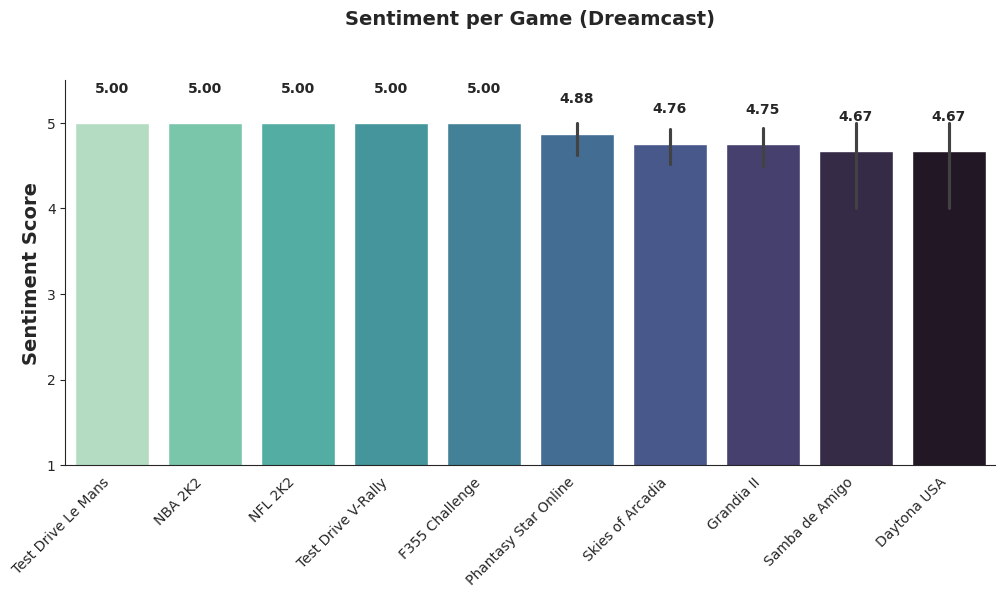

In [334]:
# Boxplot of sentiment for the different titles from Dreamcast

fig2, ax2 = plt.subplots(figsize=(12,5))
sns.set_style("ticks")

g = sns.barplot(
    DC,
    x='Title',
    y='Sentiment',
    palette='mako_r',
    order=order_val_DC
)

# label each bar in histogram
for p in ax2.patches:
 height = p.get_height()
 ax2.text(x = p.get_x()+(p.get_width()/2),
         y = height+.36,
         s = '{:.2f}'.format(height),
         ha = "center",
         fontweight='bold')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

sns.despine()
plt.ylabel("Sentiment Score", fontsize=14, fontweight="bold")
plt.xlabel("")
ax2.set_yticks([1,2,3,4,5])
ax2.set_ylim(1, 5.5)
ax2.xaxis.set_ticks_position('none')
plt.title("Sentiment per Game (Dreamcast)", fontsize=14, pad=40, fontweight='bold')

plt.show()